## CNN_Skin_Cancer_Melanoma_Assignment

### Problem Statement :- 

To build a CNN based model which can accurately detect ***Melanoma***. 
***Melanoma*** is a type of cancer that can be deadly if not detected early. 
It accounts for 75% of skin cancer deaths. 
A solution that can evaluate images and alert dermatologists 
about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.utils import plot_model

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

2024-04-08 10:10:14.558534: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/Users/girishsatyam/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/Users/girishsatyam/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180
validation_split = 0.2
seed_train_validation = 123
shuffle_value = True

Use 80% of the images for training, and 20% for validation.

In [6]:
#https://stackoverflow.com/questions/66036271/splitting-a-tensorflow-dataset-into-training-test-and-validation-sets-from-ker
# help(tf.keras.preprocessing.image_dataset_from_directory)

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir_train,
                                                               batch_size=batch_size,
                                                               image_size = (img_height, img_width),
                                                               validation_split = validation_split,
                                                               subset = "training",
                                                               seed = seed_train_validation,
                                                               color_mode = 'rgb',
                                                               shuffle = shuffle_value)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir_train,
                                                             batch_size=batch_size,
                                                             image_size = (img_height, img_width),
                                                             validation_split = validation_split,
                                                             subset = "validation",
                                                             seed = seed_train_validation,
                                                             color_mode = 'rgb',
                                                             shuffle = shuffle_value)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

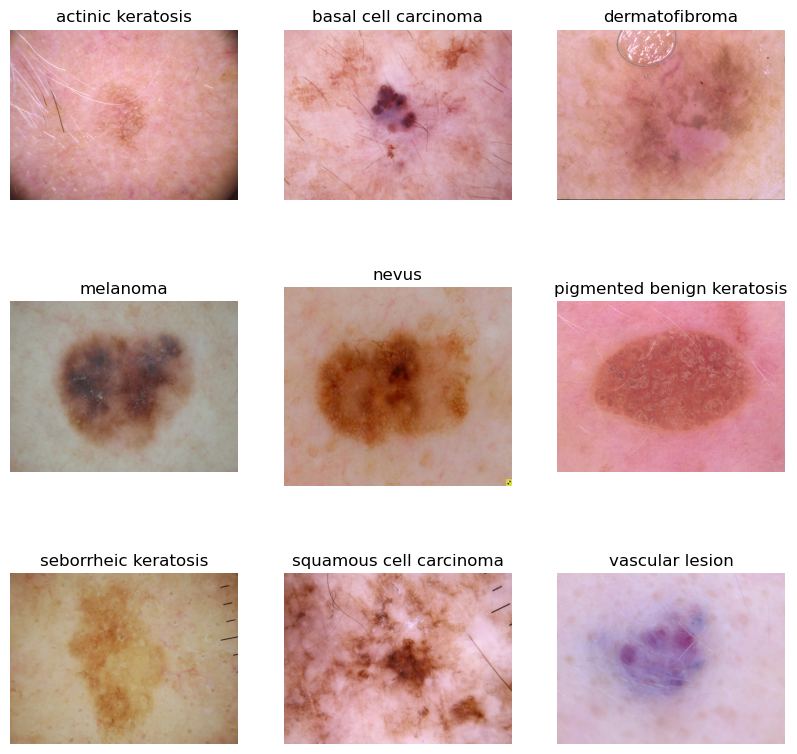

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
fig = plt.figure(figsize=(10,10))
for i in range(len(class_names)):
    plt.subplot(3,3,i+1)
    image = plt.imread(str(list(data_dir_train.glob(f'{class_names[i]}/*.jpg'))[i]))
    plt.title(class_names[i])
    plt.imshow(image)
    plt.axis('off')
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
model = Sequential()
model.add(layers.Rescaling(1/255.0, input_shape=(img_height, img_width,3)))
model.add(Conv2D(32,kernel_size=(3,3),padding="Same",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),padding="Same",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),padding="Same",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),padding="Same",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16,kernel_size=(7,7),padding="Same",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(11,11),padding="Same",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,kernel_size=(3,3),padding="Same",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(9,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                    

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                    

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


2024-04-08 10:10:20.128178: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1792]
	 [[{{node Placeholder/_4}}]]
2024-04-08 10:10:20.128634: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1792]
	 [[{{node Placeholder/_4}}]]


56/56 [==============================] - ETA: 0s - loss: 2.0693 - accuracy: 0.1780

2024-04-08 10:12:04.796929: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [447]
	 [[{{node Placeholder/_4}}]]
2024-04-08 10:12:04.797541: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [447]
	 [[{{node Placeholder/_0}}]]


56/56 [==============================] - 118s 2s/step - loss: 2.0693 - accuracy: 0.1780 - val_loss: 2.0495 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 86s 2s/step - loss: 2.0054 - accuracy: 0.2042 - val_loss: 1.9482 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 61s 1s/step - loss: 2.0147 - accuracy: 0.1959 - val_loss: 2.0207 - val_accuracy: 0.1924
Epoch 4/20
56/56 [==============================] - 71s 1s/step - loss: 1.9734 - accuracy: 0.2489 - val_loss: 1.9790 - val_accuracy: 0.2416
Epoch 5/20
56/56 [==============================] - 63s 1s/step - loss: 1.8232 - accuracy: 0.3025 - val_loss: 1.9110 - val_accuracy: 0.2438
Epoch 6/20
56/56 [==============================] - 61s 1s/step - loss: 1.7701 - accuracy: 0.3488 - val_loss: 1.7539 - val_accuracy: 0.3624
Epoch 7/20
56/56 [==============================] - 51s 915ms/step - loss: 1.6762 - accuracy: 0.3761 - val_loss: 1.7209 - val_accuracy: 0.3602
Epoch 8/20
56/56 [=========

### Visualizing training results

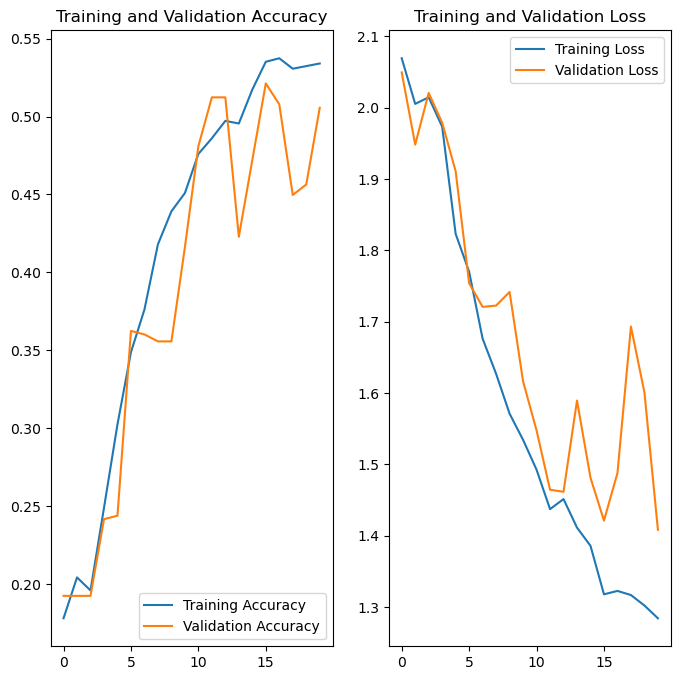

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

*   The training accuracy and validation accurcy are almost same and at the same time, they are very low, which indicates that the model is underfitting.
*    Training loss is very low but we see that the validation loss is fluctuating

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit,
# choose an appropriate data augumentation strategy.
# Your code goes here
agumentation_data = tf.keras.Sequential(
    [layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",input_shape=(img_height, img_width,3)),
     layers.experimental.preprocessing.RandomRotation(0.2),
     layers.experimental.preprocessing.RandomZoom(0.3),
     layers.experimental.preprocessing.RandomContrast(0.1)
     ]
)


2024-04-08 10:30:10.421053: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1792]
	 [[{{node Placeholder/_4}}]]
2024-04-08 10:30:10.422141: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1792]
	 [[{{node Placeholder/_0}}]]


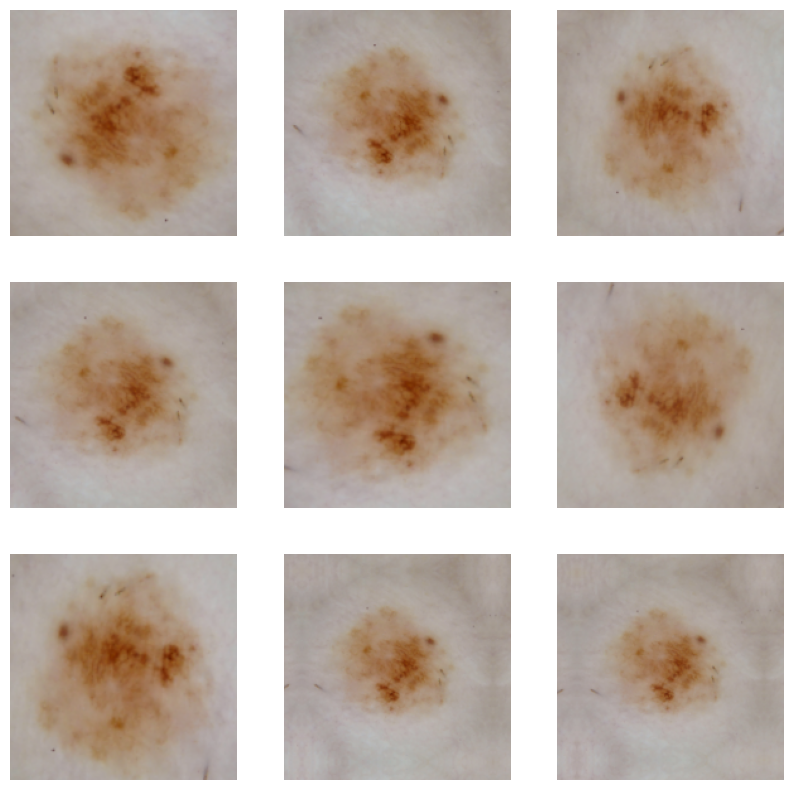

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10,10))
for images,_ in train_ds.take(1):
  for i in range(9):
    augmented_images = agumentation_data(images)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Your code goes here
model = Sequential()
model.add(layers.Rescaling(1/255.0, input_shape=(img_height, img_width,3)))
model.add(agumentation_data)

model.add(Conv2D(32, kernel_size=(3,3), padding="Same", activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), padding="Same", activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, kernel_size=(3,3), padding="Same", activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), padding="Same", activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16, kernel_size=(7,7), padding="Same", activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(11,11), padding="Same", activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3,3), padding="Same", activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(9,activation='softmax'))

### Compiling the model

In [20]:
## Your code goes here

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 90, 90, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 90, 90, 64)        18496     
                                                      

### Training the model

In [22]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
56/56 [==============================] - 70s 1s/step - loss: 2.0601 - accuracy: 0.2031 - val_loss: 2.0443 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 63s 1s/step - loss: 2.0386 - accuracy: 0.1948 - val_loss: 2.0235 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 68s 1s/step - loss: 2.0173 - accuracy: 0.1936 - val_loss: 2.0258 - val_accuracy: 0.1924
Epoch 4/20
56/56 [==============================] - 66s 1s/step - loss: 2.0179 - accuracy: 0.1959 - val_loss: 2.0222 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 62s 1s/step - loss: 2.0172 - accuracy: 0.2115 - val_loss: 2.0292 - val_accuracy: 0.1924
Epoch 6/20
56/56 [==============================] - 62s 1s/step - loss: 2.0225 - accuracy: 0.1903 - val_loss: 2.0250 - val_accuracy: 0.1924
Epoch 7/20
56/56 [==============================] - 62s 1s/step - loss: 2.0177 - accuracy: 0.2081 - val_loss: 2.0236 - val_accuracy: 0.1924
Epoch 8/20
56/56 [==

### Visualizing the results

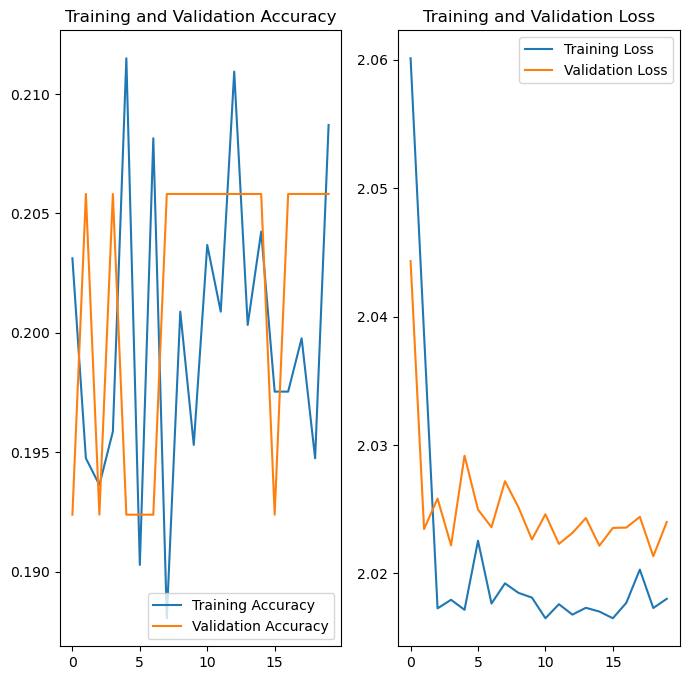

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?



*   The training accuracy and validation accuracy are almost same. But still the accuracy is very low. The model requires more epochs to train. Also we should check and hangle the class imbalance.



#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

                        class  number
0           actinic keratosis     114
1        basal cell carcinoma     376
2              dermatofibroma      95
3                    melanoma     438
4                       nevus     357
5  pigmented benign keratosis     462
6        seborrheic keratosis      77
7     squamous cell carcinoma     181
8             vascular lesion     139


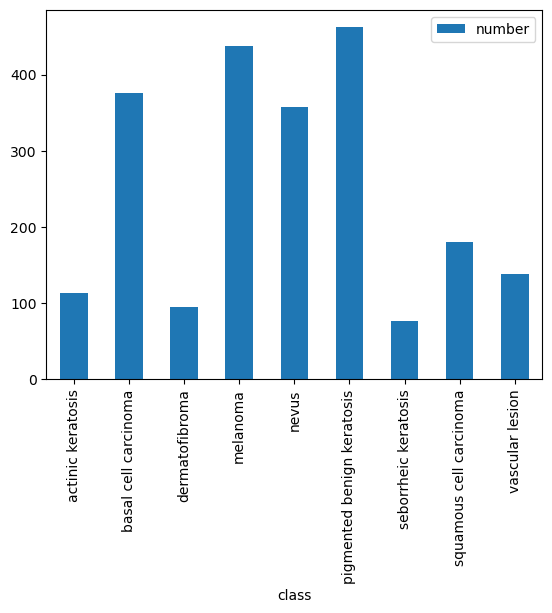

In [24]:
## Your code goes here.
class_dif = pd.DataFrame()
for i in range(len(class_names)):
  name = class_names[i]
  number = len(list(data_dir_train.glob(f'{class_names[i]}/*.jpg')))
  class_dif = class_dif.append({'class':name, 'number':number},ignore_index=True)

print(class_dif)

class_dif.plot.bar(x="class", y="number", rot=90)
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### seborrheic keratosis      
#### - Which classes dominate the data in terms proportionate number of samples?
#### pigmented benign keratosis     

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [26]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [33]:
path_to_training_dataset=("/Users/girishsatyam/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /Users/girishsatyam/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7B7D98A6E0>: 100%|█████████████████████████████████████████████| 500/500 [00:07<00:00, 71.33 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /Users/girishsatyam/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7B80097700>: 100%|█████████████████████████████████████████████| 500/500 [00:18<00:00, 26.97 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /Users/girishsatyam/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F7B80071240>: 100%|███████████████████████████| 500/500 [00:08<00:00, 56.81 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /Users/girishsatyam/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7F7B7E04C760>: 100%|█████████████████████████| 500/500 [00:37<00:00, 13.35 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /Users/girishsatyam/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2592x1944 at 0x7F7B8009DBA0>: 100%|███████████████████████████████████████████| 500/500 [00:40<00:00, 12.41 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /Users/girishsatyam/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7B8005E1A0>: 100%|█████████████████████████████████████████████| 500/500 [00:08<00:00, 60.88 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /Users/girishsatyam/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F7B7E5EE410>: 100%|████████████████████████████████████████████| 500/500 [00:22<00:00, 22.66 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /Users/girishsatyam/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7B7E18FB20>: 100%|█████████████████████████████████████████████| 500/500 [00:09<00:00, 50.80 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /Users/girishsatyam/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F7B7E5EDCC0>: 100%|███████████████████████████| 500/500 [00:08<00:00, 56.55 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [34]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [35]:
from glob import glob

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/Users/girishsatyam/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010396.jpg_ca1cc135-2923-43dd-b1f0-333ffce863a4.jpg',
 '/Users/girishsatyam/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010707.jpg_c111235c-d763-4d6f-a724-8e9558087ac1.jpg',
 '/Users/girishsatyam/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000459.jpg_bd6a0161-3210-4b09-a618-5acc24a5df97.jpg',
 '/Users/girishsatyam/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010358.jpg_056145eb-b1ad-4058-a671-82923eeae372.jpg',
 '/Users/girishsatyam/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000160.jpg_38aae137-c44e-479e-abfb-477c170c7d4c.jpg',
 '/Users/girishsatyam/Download

In [36]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [37]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [38]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [39]:
new_df['Label'].value_counts()

melanoma                      500
pigmented benign keratosis    500
nevus                         500
basal cell carcinoma          500
actinic keratosis             500
squamous cell carcinoma       500
vascular lesion               500
seborrheic keratosis          500
dermatofibroma                500
Name: Label, dtype: int64

Therefore, we have supplemented 500 images to each class to ensure a balanced distribution. Additional images can be incorporated as needed to enhance the training process.

#### **Todo**: Train the model on the data created using Augmentor

In [41]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [43]:
qdata_dir_train="/Users/girishsatyam/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [44]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation", ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [45]:
## your code goes here

model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))

model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(256,kernel_size=(11,11),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(len(class_names),activation='softmax'))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [47]:
## your code goes here
opt=tf.keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [48]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/50


2024-04-08 16:23:19.783593: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [5392]
	 [[{{node Placeholder/_4}}]]
2024-04-08 16:23:19.783865: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5392]
	 [[{{node Placeholder/_0}}]]


169/169 [==============================] - ETA: 0s - loss: 2.1205 - accuracy: 0.1818

2024-04-08 16:27:45.493871: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1347]
	 [[{{node Placeholder/_4}}]]
2024-04-08 16:27:45.494366: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1347]
	 [[{{node Placeholder/_0}}]]


169/169 [==============================] - 287s 2s/step - loss: 2.1205 - accuracy: 0.1818 - val_loss: 1.9837 - val_accuracy: 0.1841
Epoch 2/50
169/169 [==============================] - 274s 2s/step - loss: 1.9008 - accuracy: 0.2485 - val_loss: 1.7451 - val_accuracy: 0.3118
Epoch 3/50
169/169 [==============================] - 265s 2s/step - loss: 1.7318 - accuracy: 0.3264 - val_loss: 1.5615 - val_accuracy: 0.4150
Epoch 4/50
169/169 [==============================] - 273s 2s/step - loss: 1.6055 - accuracy: 0.3813 - val_loss: 1.4573 - val_accuracy: 0.4224
Epoch 5/50
169/169 [==============================] - 267s 2s/step - loss: 1.6194 - accuracy: 0.3689 - val_loss: 1.4437 - val_accuracy: 0.4388
Epoch 6/50
169/169 [==============================] - 264s 2s/step - loss: 1.5607 - accuracy: 0.3976 - val_loss: 1.3779 - val_accuracy: 0.4521
Epoch 7/50
169/169 [==============================] - 352s 2s/step - loss: 1.4798 - accuracy: 0.4260 - val_loss: 1.3594 - val_accuracy: 0.4573
Epoch 8/50

#### **Todo:**  Visualize the model results

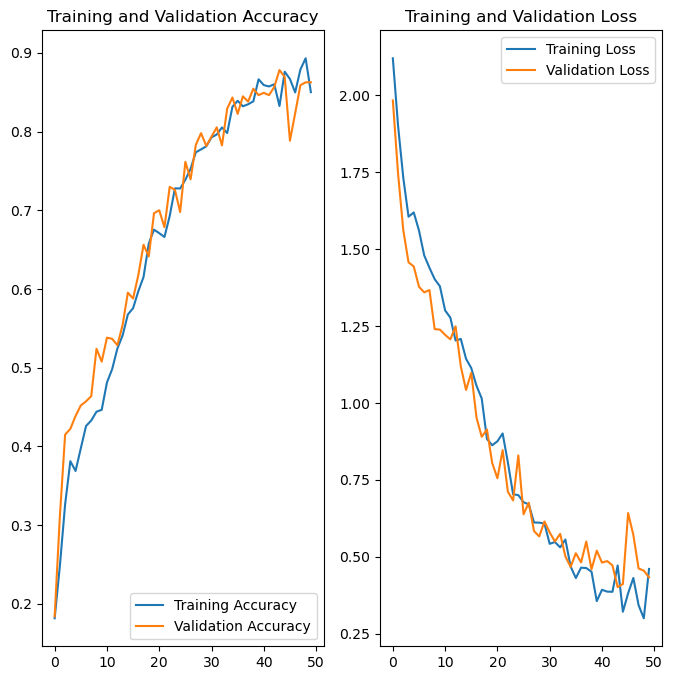

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



1.   The training accuracy and validation accuracy exhibit a close resemblance, indicating a good fit.
2.   The training loss and validation loss show nearly identical values, which is indicative of a good fit.
3.   The validation accuracy stands at 0.87, indicating a satisfactory performance. The model successfully classifies images with an accuracy of 87%.